Цель: смоделировать работу управляющее воздействие с различными вариантами настрое PID

Берем в качестве исходных данных 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 
sys.path.append("../src")
from alphabot.pid_module import PidController

In [2]:
data = load_data('./data/success_after_fantom_disable1.log')
sensor0=data['sensor0']
sensor1=data['sensor1']
sensor2=data['sensor2']
sensor3=data['sensor3']
sensor4=data['sensor4']
left_pid_out = data['left_pid_out']
right_pid_out = data['right_pid_out']
actual_right_pid_out = []

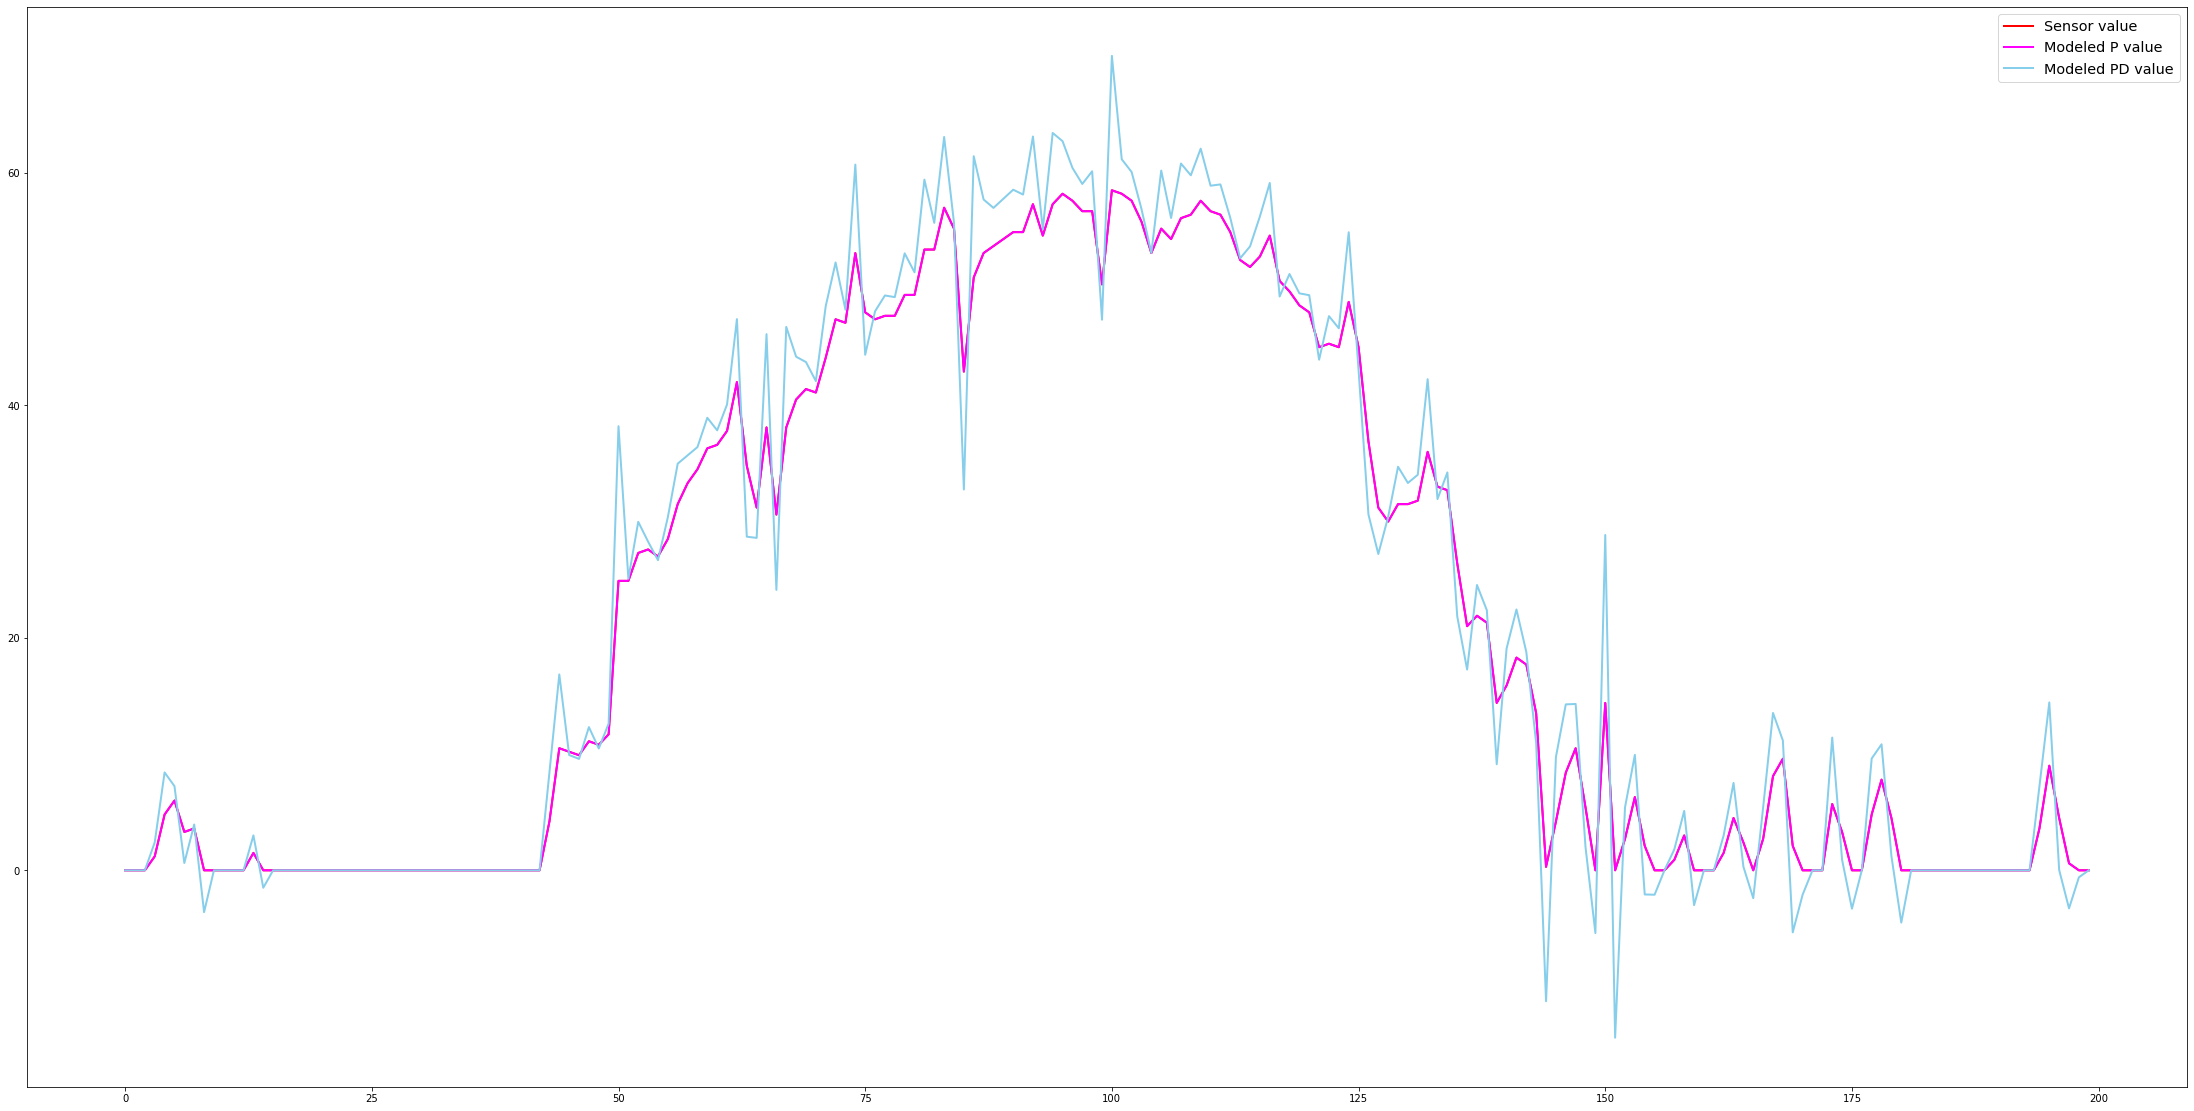

In [14]:
range = 200
start = 3550
end = start + range
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
sensor1_normed = [(x-265)*0.3 for x in sensor1]



MAX_OUT = 100
TARGET_VALUE = 265

KP = 0.3
KD = 0
KI = 0
pid = PidController(KP, KI, KD, TARGET_VALUE, MAX_OUT)
p_out = [pid.getOutput(x, 1)*-1 for x in sensor1]

KP = 0.3
KD = 0.3
KI = 0.001
pid = PidController(KP, KI, KD, TARGET_VALUE, MAX_OUT)
pd_out = [pid.getOutput(x, 1)*-1 for x in sensor1]



ax.plot(sensor1_normed[start:end], linewidth=2.0, color = 'red', label='Sensor value')
#ax.bar(np.arange(0,range,1), sensor1_normed[start:end], color = 'tomato', alpha = 0.3)
#ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Real PID value')
#ax.bar(np.arange(0,range,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')

ax.plot(p_out[start:end], linewidth=2.0, color = 'magenta', label = 'Modeled P value')
#ax.bar(np.arange(0,range,1), p_out[start:end], alpha = 0.3, color = 'magenta')

ax.plot(pd_out[start:end], linewidth=2.0, color = 'skyblue', label = 'Modeled PD value')

ax.legend(fontsize = 'x-large')


 Необходимо обрабатывать отрицательные значения PID для включения обратного воздействия при резком приближении к нулю

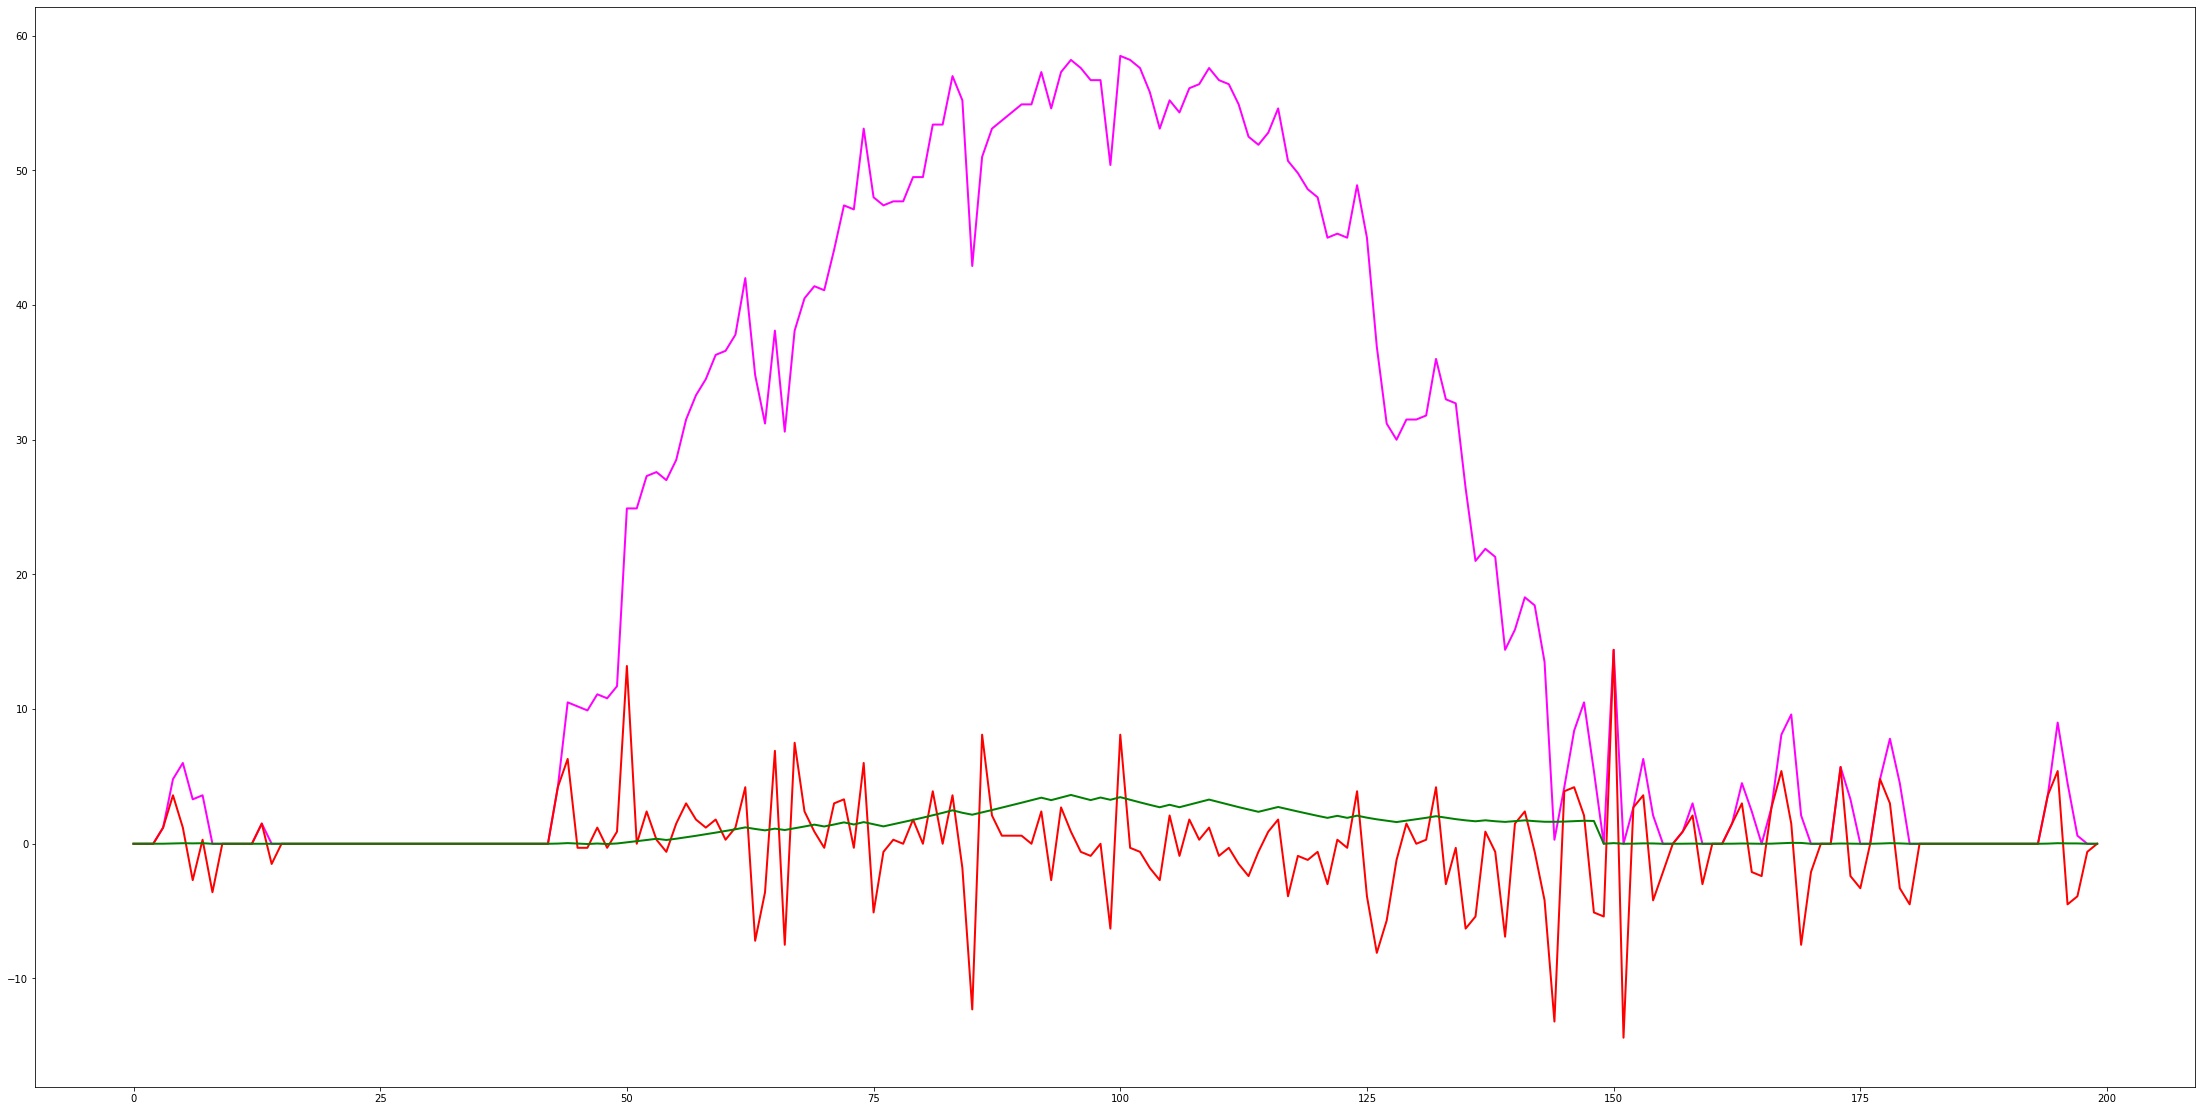

In [13]:
KP = 0.3
KD = 0.3
KI = 0.001
pid = PidController(KP, KI, KD, TARGET_VALUE, MAX_OUT)

p_out,d_out,i_out = [],[],[]

for x in sensor1:
    pd_out = pid.getOutput(x, 1)*-1
    p_out.append(pid._telemetry_data['po']*-1)
    d_out.append(pid._telemetry_data['do']*-1)
    i_out.append(pid._telemetry_data['io']*-1)

fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])
ax.plot(p_out[start:end], linewidth=2.0, color = 'magenta', label = 'Modeled P value')
ax.plot(d_out[start:end], linewidth=2.0, color = 'red', label = 'Modeled D value')
ax.plot(i_out[start:end], linewidth=2.0, color = 'green', label = 'Modeled I value')